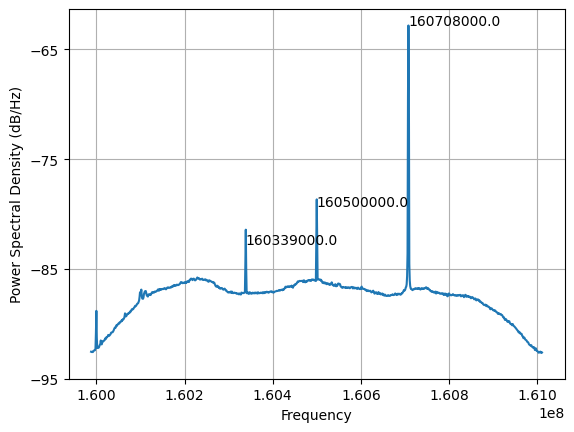

In [1]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

samples = np.fromfile('../data/test_multiple_4.s8', np.uint8)
#samples = np.fromfile('../data/test_airspyhf.fc32', dtype=np.complex64)
sample_rate = 1024000
center_freq = 160500000
size = len(samples)
x = samples

x = x.astype(np.float32)
x = (x - 127) / 128
x = x[::2] + x[1::2]*1j

# PLOT THE PSD
fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=1024000, Fc=160500000)
peaks = signal.find_peaks(psd[0], prominence=0.000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show()





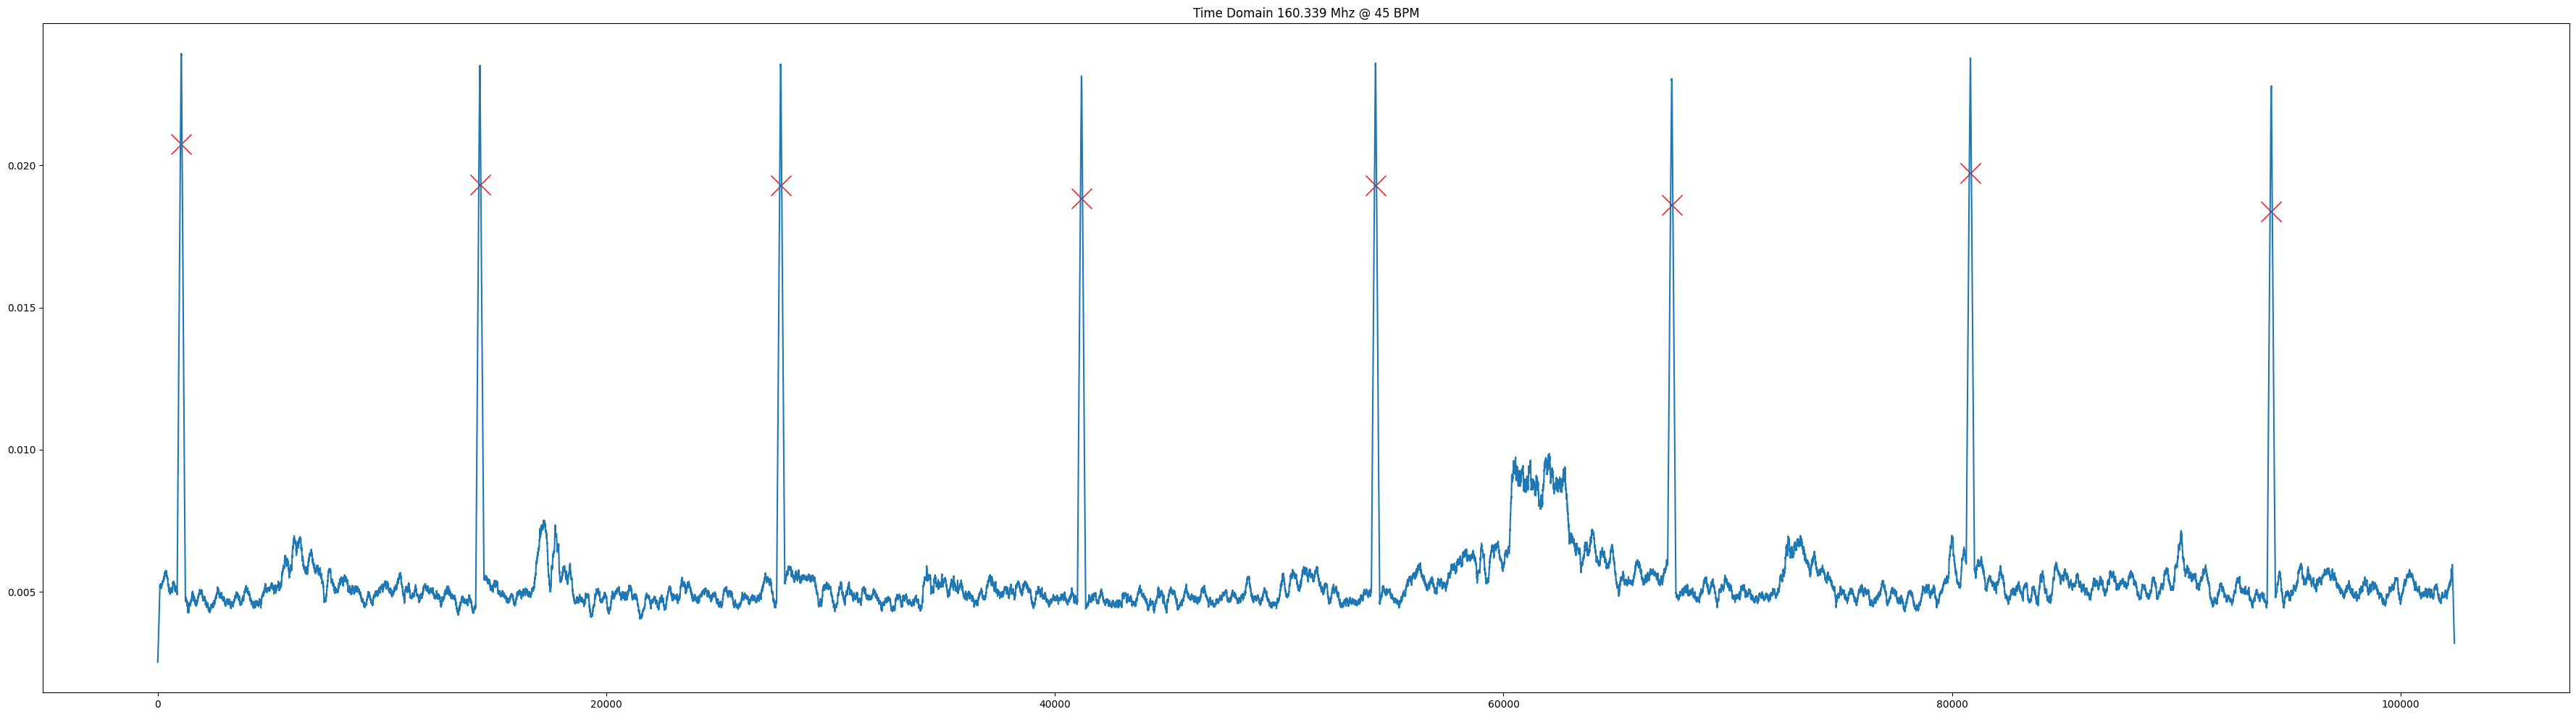

In [2]:
# FILTER AND PLOT TIME DOMAIN 160.339Mhz

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*161000)

y = x

y = y * p
y = signal.convolve(y, h, 'same')
y = y[::100]
y = np.abs(y)
y = signal.convolve(y, [1]*189, 'same')/189

y_peaks = signal.find_peaks(y, prominence=0.008)

plt.figure(figsize=(45,12))
plt.plot(y_peaks[0], y_peaks[1]["prominences"], marker='x', linestyle='', color="r", markersize=20)
plt.plot(y)

plt.title(f"Time Domain 160.339 Mhz @ {int (60 / ((y_peaks[0][3]-y_peaks[0][2]) / 10240))} BPM")
plt.show()


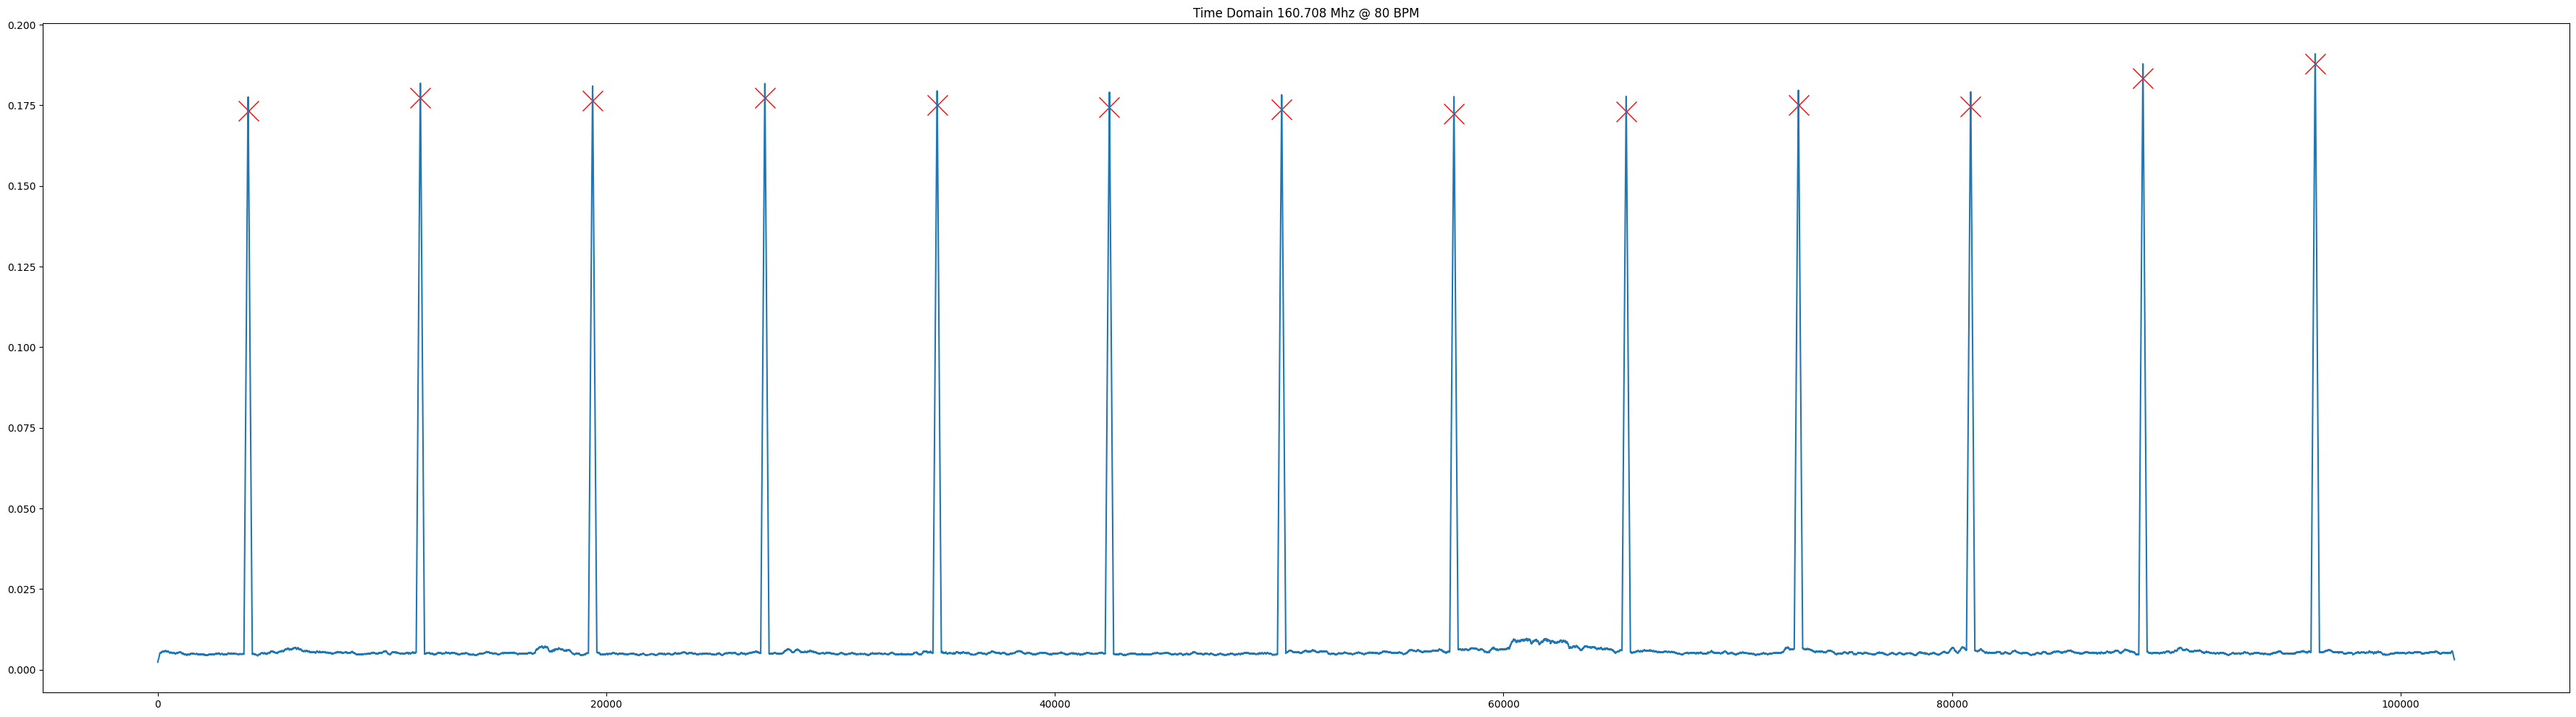

In [3]:
# FILTER AND PLOT TIME DOMAIN 160.708Mhz

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-208000)

z = x

z = z * p
z = signal.convolve(z, h, 'same')
z = z[::100]
z = np.abs(z)
z = signal.convolve(z, [1]*189, 'same')/189

z_peaks = signal.find_peaks(z, prominence=0.1)

plt.figure(figsize=(45,12))
plt.plot(z_peaks[0], z_peaks[1]["prominences"], marker='x', linestyle='', color="r", markersize=20)
plt.plot(z)

plt.title(f"Time Domain 160.708 Mhz @ {int (60 / ((z_peaks[0][3]-z_peaks[0][2]) / 10240))} BPM")
plt.show()

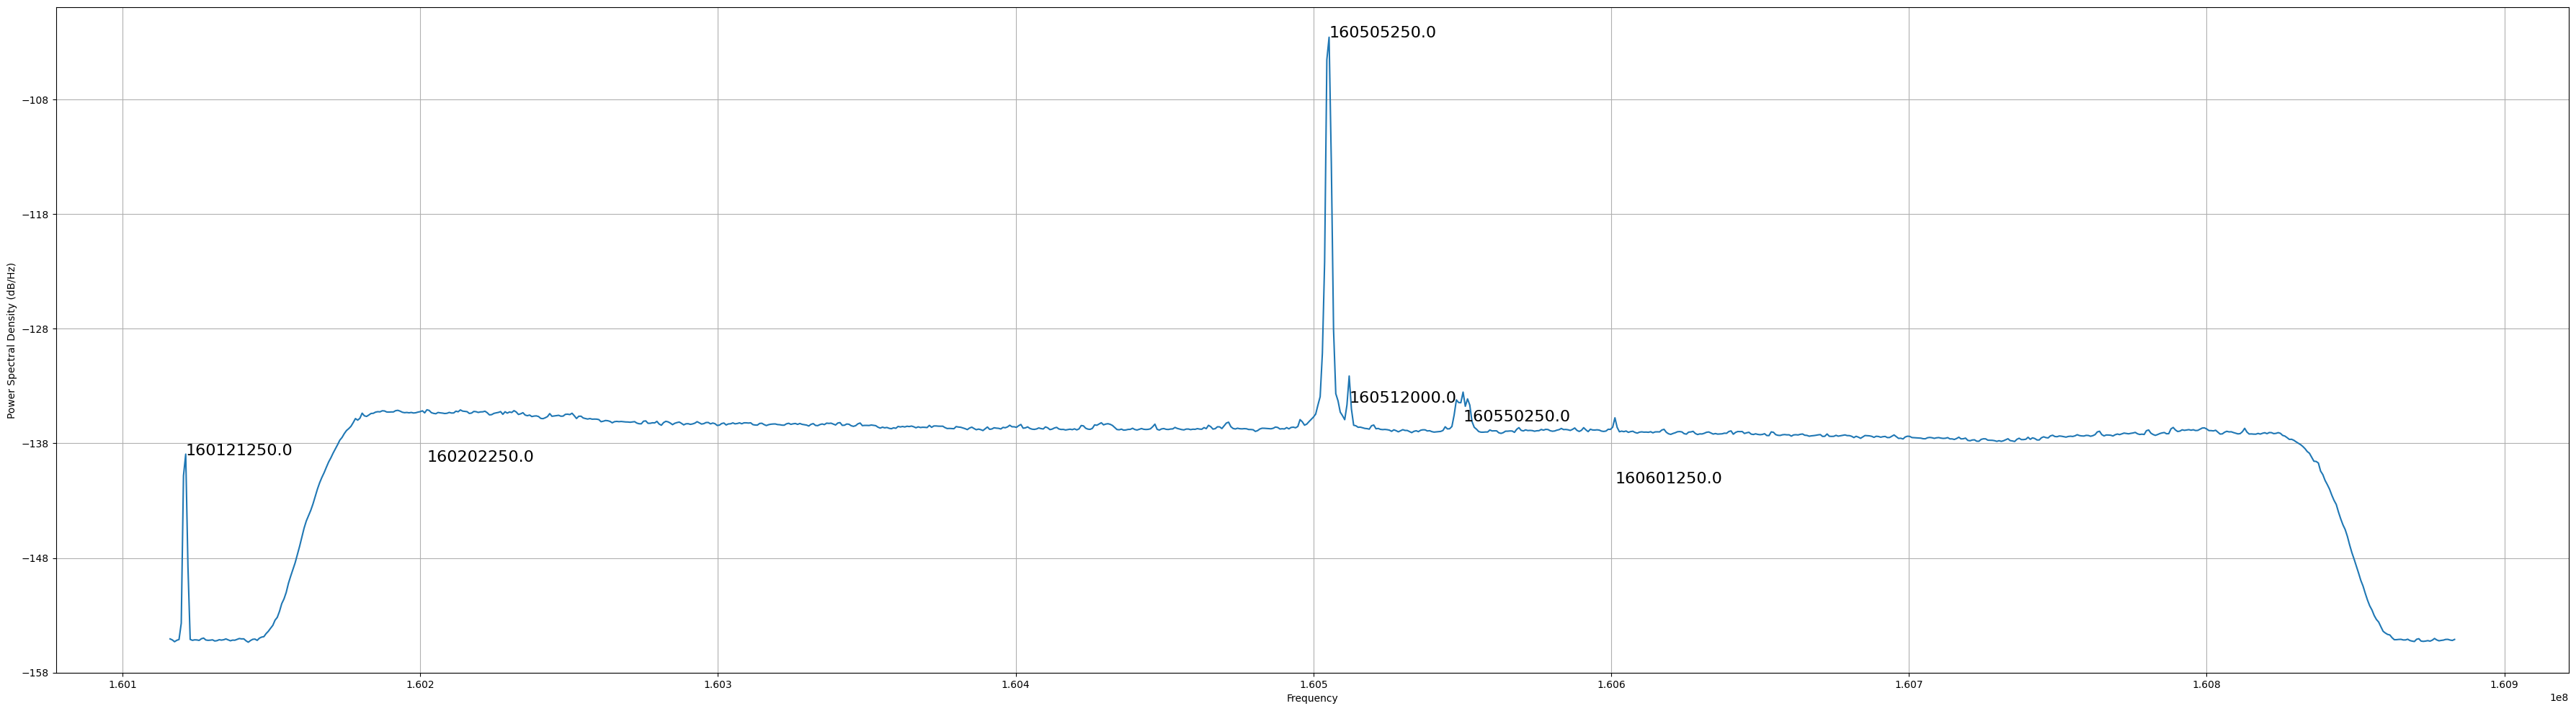

<Figure size 4500x1200 with 0 Axes>

In [20]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

# WEAK SIGNAL - FROM AIRSPY 

#samples = wavfile.read('../data/test_airspyhf.raw')
#samples = np.fromfile('../data/test_airspyhf.fc32', dtype=np.complex64)
samples = np.fromfile('../data/range_3.fc32', dtype=np.complex64)
sample_rate = 768000
center_freq = 160500000
size = len(samples)
x = samples

fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
plt.figure(figsize=(45,12))
psd = plt.psd(x, NFFT=1024, Fs=768000, Fc=160500000)
peaks = signal.find_peaks(psd[0], prominence=0.000000000000007)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)), size=16)
plt.figure(figsize=(45,12))
plt.show()


79.01
76.52
78.55
79.43
80.6


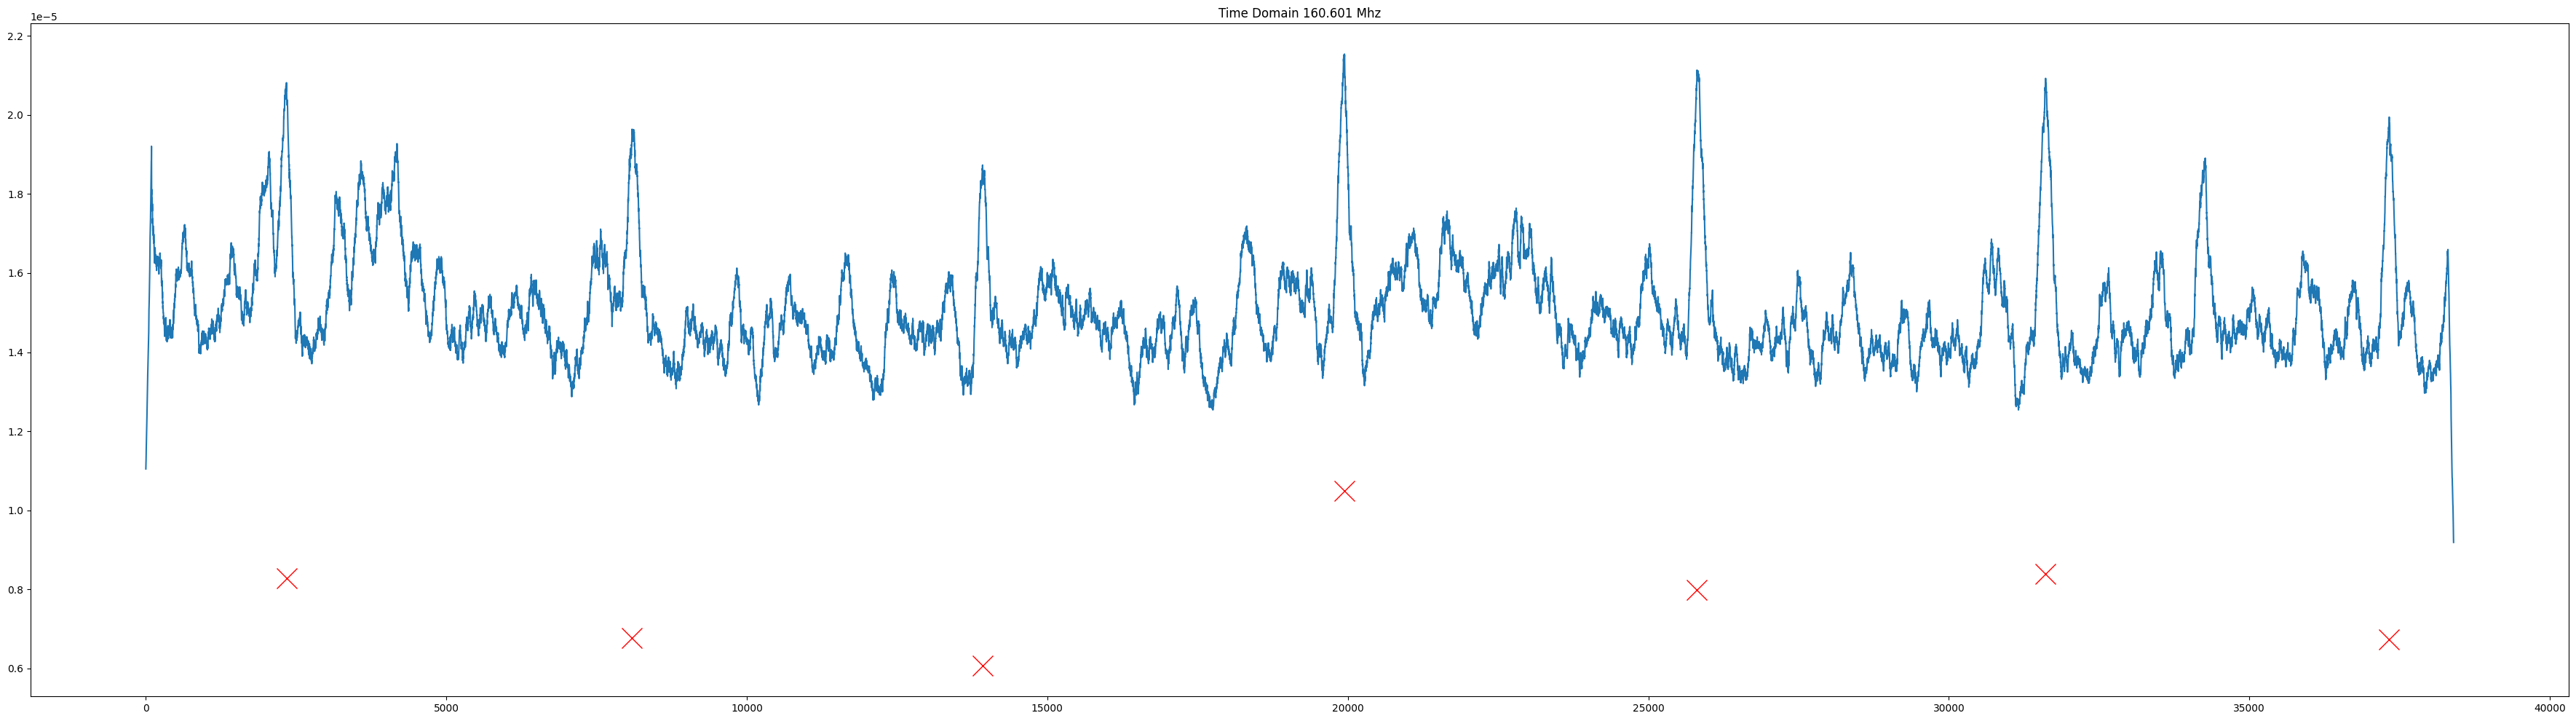

In [36]:

# FILTER AND PLOT TIME DOMAIN 160.601120Mhz

t = np.arange(len(x))/768000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-101120)

z = x

z = z * p
z = signal.convolve(z, h, 'same')
z = z[::100]
z = np.abs(z)
z = signal.convolve(z, [1]*189, 'same')/189

z_peaks = signal.find_peaks(z, prominence=0.000006)

plt.figure(figsize=(45,12))
plt.plot(z_peaks[0], z_peaks[1]["prominences"], marker='x', linestyle='', color="r", markersize=20)
for i in range (1, len(z_peaks[0])-1):
    print(round((7680/(z_peaks[0][i+1]-z_peaks[0][i]))*60, 2))
    plt.annotate(round((7680/(z_peaks[0][i+1]-z_peaks[0][i]))*60, 2), xy=( z_peaks[0][i]+10 , 0.8))
plt.plot(z)

plt.title(f"Time Domain 160.601 Mhz")
plt.show()